----
# I. Data preprocessing

## 1. Read dataset

In [1]:
import pandas as pd

train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")
submission = pd.read_csv("dataset/sample_submission.csv")

## 2. Missing values handling

### a) `train.csv`

In [2]:
train = train.fillna(0)

### b) `test.csv`

In [3]:
means = {
    "Promotion1":test["Promotion1"].mean(), "Promotion2":test["Promotion2"].mean(), 
    "Promotion3":test["Promotion3"].mean(), "Promotion4":test["Promotion4"].mean(), 
    "Promotion5":test["Promotion5"].mean()
}
test = test.fillna(value=means)

## 3. Data manipulation

### a) `Date`

In [4]:
import datetime as dt

def date_to_week(date):
    day, month, year = map(int, date.split('/'))
    t = dt.datetime(year, month, day) - dt.datetime(2010, 2, 5)
    return t.days // 7


def date_split(date):
    return tuple(map(int, date.split('/')))


# train
#train["Week"] = train["Date"].apply(date_to_week)
train["Day"] = train["Date"].apply(lambda x: date_split(x)[0])
train["Month"] = train["Date"].apply(lambda x: date_split(x)[1])
train["Year"] = train["Date"].apply(lambda x: date_split(x)[2])


# test
#test["Week"] = test["Date"].apply(date_to_week)
test["Day"] = test["Date"].apply(lambda x: date_split(x)[0])
test["Month"] = test["Date"].apply(lambda x: date_split(x)[1])
test["Year"] = test["Date"].apply(lambda x: date_split(x)[2])

### b) `IsHoliday`

In [5]:
# trian
train["IsHoliday"] = train["IsHoliday"].apply(int)

# test
test["IsHoliday"] = test["IsHoliday"].apply(int)

### c) `Store`

In [6]:
# train
train = pd.get_dummies(data=train, columns=["Store"])

# test
test = pd.get_dummies(data=test, columns=["Store"])

### d) `Promotion1`, ... , `Promotion5`

In [7]:
# Scaling
from sklearn.preprocessing import RobustScaler


promos = ['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']

scaler = RobustScaler()
scaler.fit(train[promos])
train[promos] = scaler.transform(train[promos])
test[promos] = scaler.transform(test[promos])

### e) `Weekly_Sales` 

In [8]:
import numpy as np

train["Weekly_Sales"] = np.log1p(train["Weekly_Sales"])

## 4. Remove not using features

In [9]:
remove = ['id','Date']

train = train.drop(columns=remove)
test = test.drop(columns=remove)

In [10]:
train

,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,42.31,2.572,0.000000,0.0,0.000000,0.000000,0.000000,8.106,0,14.312455,...,0,0,0,0,0,0,0,0,0,0
1,38.51,2.548,0.000000,0.0,0.000000,0.000000,0.000000,8.106,1,14.311400,...,0,0,0,0,0,0,0,0,0,0
2,39.93,2.514,0.000000,0.0,0.000000,0.000000,0.000000,8.106,0,14.292967,...,0,0,0,0,0,0,0,0,0,0
3,46.63,2.561,0.000000,0.0,0.000000,0.000000,0.000000,8.106,0,14.158908,...,0,0,0,0,0,0,0,0,0,0
4,46.50,2.625,0.000000,0.0,0.000000,0.000000,0.000000,8.106,0,14.256862,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,75.09,3.867,12.335020,60.0,33.248658,36.566951,2.226726,8.684,0,13.506671,...,0,0,0,0,0,0,0,0,0,1
6251,75.70,3.911,5.752087,128.0,18.830054,9.705248,1.146626,8.684,1,13.549608,...,0,0,0,0,0,0,0,0,0,1
6252,67.87,3.948,5.952181,0.0,1.538462,17.904453,2.938893,8.684,0,13.462029,...,0,0,0,0,0,0,0,0,0,1
6253,65.32,4.038,4.409997,922.8,22.626118,12.434619,4.836166,8.684,0,13.491285,...,0,0,0,0,0,0,0,0,0,1


In [11]:
test

,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Day,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,68.55,3.617,4.214698,646.72,6.518784,18.928523,2.022584,6.573,0,5,...,0,0,0,0,0,0,0,0,0,0
1,62.99,3.601,1.088480,646.72,2.901610,3.151902,3.305649,6.573,0,12,...,0,0,0,0,0,0,0,0,0,0
2,67.97,3.594,0.495842,646.72,1.763864,0.419915,1.290059,6.573,0,19,...,0,0,0,0,0,0,0,0,0,0
3,69.16,3.506,1.349186,317.50,2.146691,5.531683,0.727907,6.573,0,26,...,0,0,0,0,0,0,0,0,0,0
4,70.27,3.617,3.150245,646.72,3.592129,15.840982,2.149345,6.170,0,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,46.97,3.755,0.020166,26.10,0.350626,6.720423,0.255318,5.217,0,26,...,0,0,0,0,0,0,0,0,1,0
176,64.89,3.985,2.633173,646.72,6.733453,11.791272,1.305208,8.667,0,5,...,0,0,0,0,0,0,0,0,0,1
177,54.47,4.000,1.020703,646.72,2.822898,3.135995,2.225839,8.667,0,12,...,0,0,0,0,0,0,0,0,0,1
178,56.47,3.969,1.045612,646.72,1.137746,2.290461,0.857580,8.667,0,19,...,0,0,0,0,0,0,0,0,0,1


----
# II. Modeling

## 1. Divide `train.csv` into training data and for predicting data

In [12]:
x_train = train.drop(columns=["Weekly_Sales"])
y_train = train["Weekly_Sales"]

## 2. Choose a suitable model

In [13]:
predictions = {}

### a) XGBoost

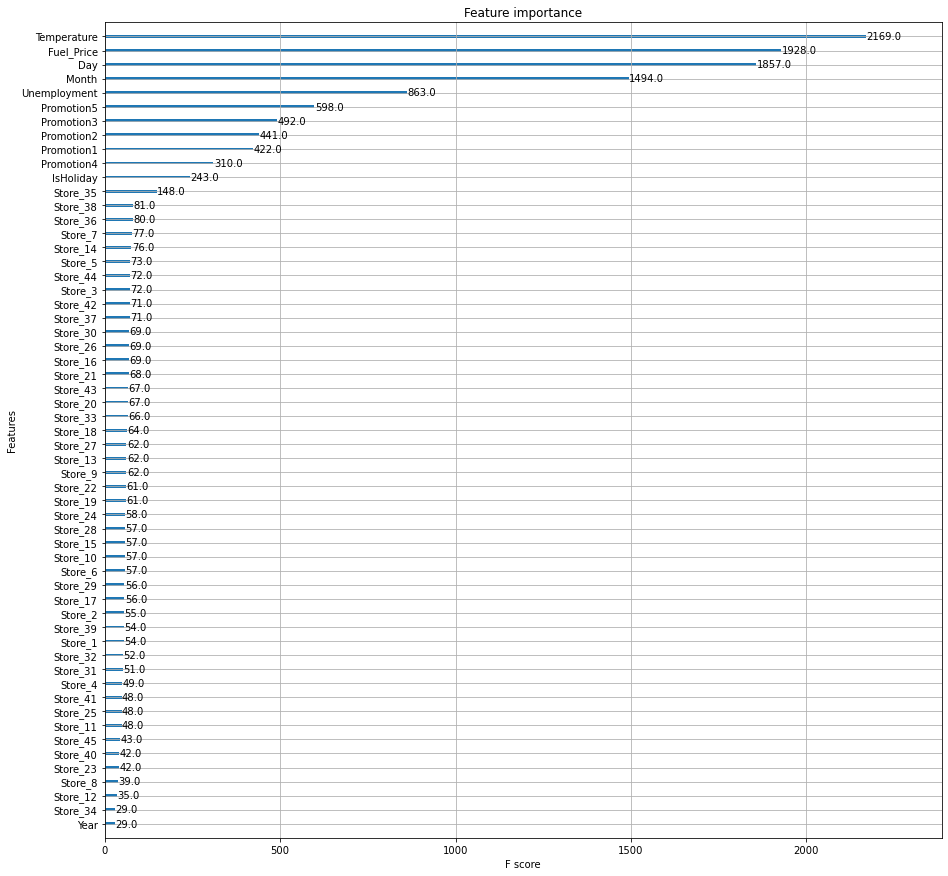

[XGBoost] => time: 2.86(sec)
1695461.0, 1559800.125, ... , 797151.5625


In [14]:
import time
import xgboost as xgb
from matplotlib import pyplot as plt


start_t = time.time()

model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth = 4, n_estimators = 1000)
model.fit(x_train, y_train)
plt.rcParams["figure.figsize"] = (15,15)
xgb.plot_importance(model)
plt.show()

prediction = np.expm1(model.predict(test))
predictions["XGBoost"] = prediction

print(f"[XGBoost] => time: {round(time.time() - start_t, 2)}(sec)")
print(f"{prediction[0]}, {prediction[1]}, ... , {prediction[-1]}")

----
# III. Submission

In [15]:
import os

def name(integer):
    return str(integer).zfill(2)
    
savetime = dt.datetime.now()
folder = "-".join(map(name, [savetime.year, savetime.month, savetime.day]))
sub_folder = name(savetime.hour) + '：' + name(savetime.minute) + '：' + name(savetime.second)

for model in predictions:
    submission["Weekly_Sales"] = predictions[model]
    os.makedirs(f"dataset/submissions/{folder}", exist_ok=True)
    submission.to_csv(f"dataset/submissions/{folder}/{sub_folder+' ('+model+')'}.csv", index=False)